In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [176]:
cars = pd.read_csv("data/used_car_sales.csv")
initial_count = len(cars)

# Rename Columns
cars = cars.rename(columns={"pricesold":"Sale Price", "yearsold":"Year Sold", "BodyType":"Vehicle Class", "DriveType":"Drive", "NumCylinders":"Cylinders", "zipcode":"Zip"})

print(f"Dataset has {initial_count} rows\n")
print(cars.dtypes)

Dataset has 122144 rows

ID                int64
Sale Price        int64
Year Sold         int64
Zip              object
Mileage           int64
Make             object
Model            object
Year              int64
Trim             object
Engine           object
Vehicle Class    object
Cylinders         int64
Drive            object
dtype: object


In [177]:
# Dropping rows with null data in columns of interest
cars = cars.dropna(subset=["ID", "Sale Price", "Year Sold", "Mileage", "Make", "Model", "Year", "Engine", "Vehicle Class", "Drive"])
count1 = len(cars)
print(f"Dropped {initial_count-count1} rows with null values\n")

# Remove duplicate rows based on some columns
cars = cars.drop_duplicates(subset=["Sale Price","Year Sold","Mileage","Make","Year"])
count2 = len(cars)
print(f"Dropped {count1 - count2} duplicate rows\n")

# String formatting
string_columns = cars.select_dtypes(["object"])
cars[string_columns.columns] = string_columns.apply(lambda x: x.str.strip()).apply(lambda x: x.str.upper())
cars.describe()

Dropped 42159 rows with null values

Dropped 47 duplicate rows



,ID,Sale Price,Year Sold,Mileage,Year,Cylinders
count,79938.000000,79938.000000,79938.000000,7.993800e+04,7.993800e+04,7.993800e+04
mean,84701.838750,10866.223698,2019.372526,9.314208e+05,3.496387e+03,2.686986e+04
std,47707.302068,13604.708975,0.502736,2.675838e+07,1.731962e+05,7.595445e+06
min,1.000000,0.000000,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,43980.250000,3000.000000,2019.000000,4.700000e+04,1.986000e+03,4.000000e+00
50%,85272.500000,6600.000000,2019.000000,9.241750e+04,2.002000e+03,6.000000e+00
75%,125657.750000,14100.000000,2020.000000,1.431702e+05,2.009000e+03,8.000000e+00
max,165801.000000,404990.000000,2020.000000,1.234568e+09,2.014000e+07,2.147484e+09


In [178]:
# Removing some numerical values that don't make sense - based on above .describe()
cars = cars[cars["Sale Price"] > 100]
cars = cars[cars["Mileage"] > 50]
cars = cars[cars["Mileage"] < 1000000]
cars = cars[cars["Year"] > 1900]
cars = cars[cars["Year"] < 2021]
cars = cars[cars["Cylinders"] > 1]
cars = cars[cars["Cylinders"] < 20]
count3 = len(cars)
print(f"Dropped {count2 - count3} numerical values")

# Removing some nonsense string values - by inspection of some data
cars = cars[~cars["Make"].str.contains("OTHER")]
cars = cars[~cars["Make"].str.contains("REPLICA")]

count4 = len(cars)
print(f"Dropped {count3 - count4} nonsense strings")

Dropped 15039 numerical values
Dropped 133 nonsense strings


In [179]:
# Remove "Year Sold" column - no useful information
cars = cars[["ID", "Sale Price", "Zip", "Mileage", "Make", "Model", "Year", "Engine", "Vehicle Class", "Drive"]]

In [180]:
print(cars.dtypes)
cars.describe()

ID                int64
Sale Price        int64
Zip              object
Mileage           int64
Make             object
Model            object
Year              int64
Engine           object
Vehicle Class    object
Drive            object
dtype: object


,ID,Sale Price,Mileage,Year
count,64766.000000,64766.000000,64766.000000,64766.000000
mean,82224.952382,10755.345397,106296.934070,1995.848856
std,47210.007295,12925.243960,96674.233008,18.137057
min,1.000000,110.000000,51.000000,1909.000000
25%,42299.250000,3000.000000,49403.750000,1985.000000
50%,81948.000000,6650.000000,93330.500000,2002.000000
75%,121848.500000,14107.500000,143443.250000,2009.000000
max,165801.000000,349500.000000,999999.000000,2020.000000


array([[<Axes: title={'center': 'Mileage'}>]], dtype=object)

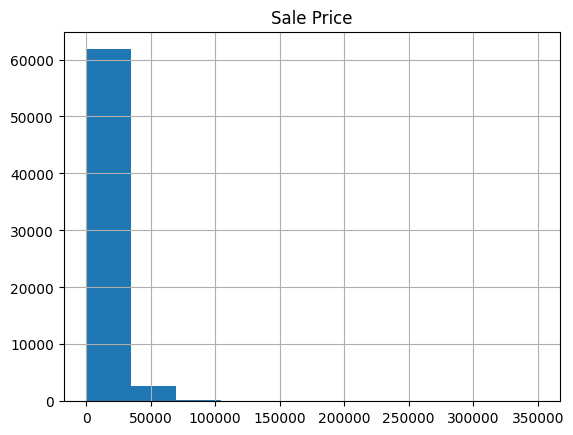

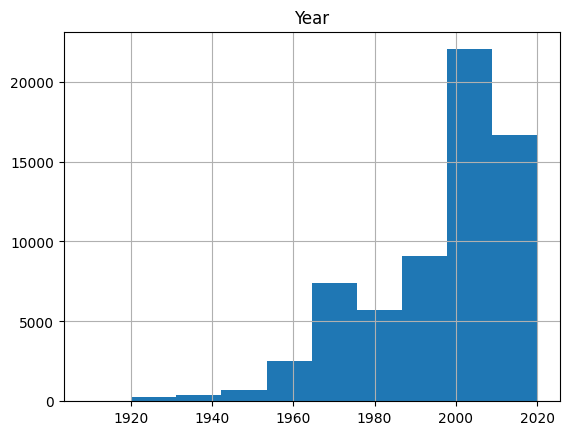

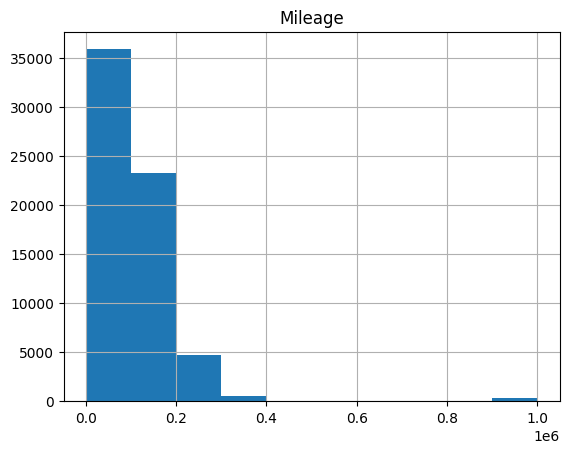

In [181]:
# Histograms for numerical data columns
cars.hist(column=["Sale Price"])
cars.hist(column=["Year"])
cars.hist(column=["Mileage"])

<Axes: xlabel='Mileage', ylabel='Sale Price'>

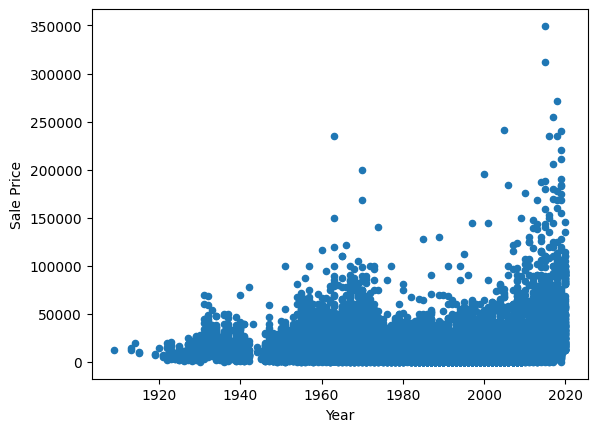

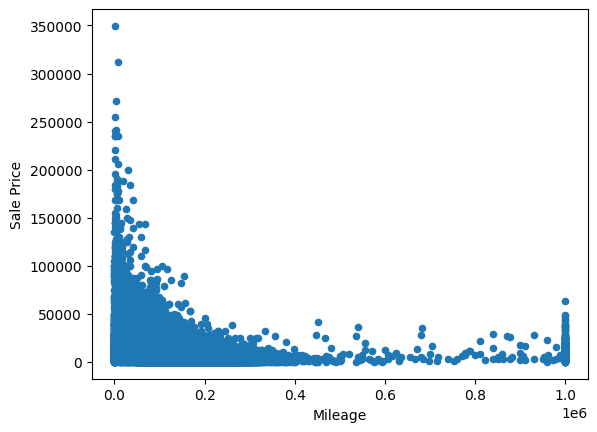

In [182]:
# Scatter Plots on numerical data
cars.plot.scatter(x="Year", y="Sale Price")
cars.plot.scatter(x="Mileage", y="Sale Price")

In [183]:
# Zip Code Table for additional location data
zipcodes = pd.read_csv("data/zip_code_database.csv")
print(zipcodes.dtypes)

zip                           int64
type                         object
decommissioned                int64
primary_city                 object
acceptable_cities            object
unacceptable_cities          object
state                        object
county                       object
timezone                     object
area_codes                   object
world_region                 object
country                      object
latitude                    float64
longitude                   float64
irs_estimated_population      int64
dtype: object


In [184]:
# Select only rows pertaining to US zipcodes
zipcodes = zipcodes.dropna(subset=["zip", "state", "country", "county"])
zipcodes = zipcodes[zipcodes["country"].str.contains("US")]

# Select useful columns
zipcodes = zipcodes[["zip", "state", "county", "latitude", "longitude"]]
zipcodes = zipcodes.rename(columns={"zip":"Zip", "state":"State", "county":"County","latitude":"Latitude", "longitude":"Longitude"})

# String formatting
string_columns = zipcodes.select_dtypes(["object"])
zipcodes[string_columns.columns] = string_columns.apply(lambda s: s.str.strip()).apply(lambda s: s.str.upper())

# Format zip column in car sales dataset
cars["Zip"] = cars["Zip"].apply(lambda x: str(x).strip("*"))
# cars.dropna(subset=["Zip"])
# cars["Zip"] = cars["Zip"].apply(lambda s: np.int64(s))
zipcodes["Zip"] = zipcodes["Zip"].apply(lambda s: str(s))
print(zipcodes.dtypes)
print(len(zipcodes))

# Create different sample to perform location based analysis, remove zipcode from main dataset
carsWithZip = cars[cars["Zip"].str.len() < 5]
print(carsWithZip.dtypes)
print(len(carsWithZip))
cars = cars[["ID", "Sale Price", "Mileage", "Make", "Model", "Year", "Engine", "Vehicle Class", "Drive"]]

# Merge cars dataframe with zipcodes dataframe
# carsWithZip = carsWithZip.merge(right=zipcodes, how="left", left_on="Zip", right_on="Zip")
def zip_lookup(zipcode):


carsWithZip = carsWithZip.set_index("Zip").join(other=zipcodes.set_index("Zip"), on="Zip", how="inner", lsuffix="_cars", rsuffix="_zips")
carsWithZip.count()

Zip           object
State         object
County        object
Latitude     float64
Longitude    float64
dtype: object
41799
ID                int64
Sale Price        int64
Zip              object
Mileage           int64
Make             object
Model            object
Year              int64
Engine           object
Vehicle Class    object
Drive            object
dtype: object
18523


ID               2012
Sale Price       2012
Mileage          2012
Make             2012
Model            2012
Year             2012
Engine           2012
Vehicle Class    2012
Drive            2012
State            2012
County           2012
Latitude         2012
Longitude        2012
dtype: int64

In [185]:
# Some EDA on car sales in different states:
print("Car Sales in New York:")
carsWithZipNY = carsWithZip[carsWithZip["State"] == "NY"]
carsWithZipNY.describe()

Car Sales in New York:


,ID,Sale Price,Mileage,Year,Latitude,Longitude
count,12.000000,12.000000,12.000000,12.000000,12.00,1.200000e+01
mean,141440.416667,14669.166667,67144.083333,1990.000000,40.81,-7.304000e+01
std,13121.076546,14505.404923,51759.277627,13.797233,0.00,1.484275e-14
min,116259.000000,1730.000000,2900.000000,1966.000000,40.81,-7.304000e+01
25%,135678.750000,5450.000000,34219.750000,1981.250000,40.81,-7.304000e+01
50%,144210.000000,8075.000000,50268.000000,1988.500000,40.81,-7.304000e+01
75%,146912.250000,16525.000000,102000.000000,1995.750000,40.81,-7.304000e+01
max,161885.000000,45100.000000,165000.000000,2011.000000,40.81,-7.304000e+01


In [186]:
print("Car Sales in California:")
carsWithZipCA = carsWithZip[carsWithZip["State"] == "CA"]
carsWithZipCA.describe()

Car Sales in California:


,ID,Sale Price,Mileage,Year,Latitude,Longitude
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
print("Car Sales in Texas:")
carsWithZipTX = carsWithZip[carsWithZip["State"] == "TX"]
carsWithZipTX.describe()

Car Sales in Texas:


,ID,Sale Price,Mileage,Year,Latitude,Longitude
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
print("Car Sales in Kansas:")
carsWithZipKS = carsWithZip[carsWithZip["State"] == "KS"]
carsWithZipKS.describe()

Car Sales in Kansas:


,ID,Sale Price,Mileage,Year,Latitude,Longitude
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN
